<a href="https://colab.research.google.com/github/pkhurt/computer-vision-course/blob/main/section_6_object_detection_template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template matching
## Definition
It's the easiest form of object detection.

It simply scans a larger image for a provided template by sliding the template target image across the larger image.

## Example:

If one has a picture of a face the template matching will search in a larger picture. It must be an exact match, so the face needs to be exactly the same.

## Principle:
Done by some sort of correlation (see {template matching}[https://en.wikipedia.org/wiki/Template_matching])

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
DATA_DIR = "/content/drive/MyDrive/udemy/python_for_computervision_opencv/DATA/"


In [3]:
full = cv2.imread(DATA_DIR + "sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

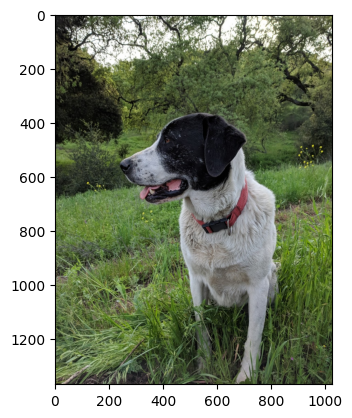

In [4]:
plt.imshow(full)

In [5]:
face = cv2.imread(DATA_DIR + "sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

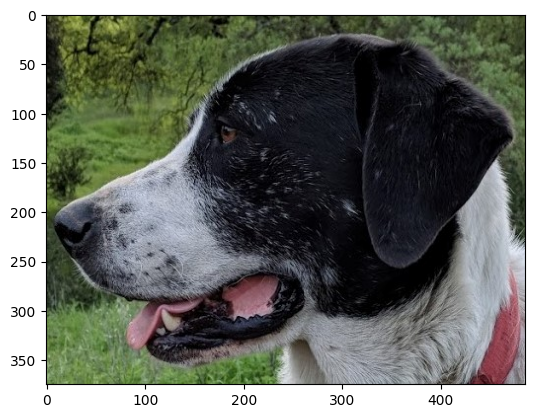

In [6]:
plt.imshow(face)

In [8]:
face.shape # The Face shape is already the exact shape in the larger image
# Now we scan the image with a sliding window to find if we have a match

(375, 486, 3)

In [9]:
# eval function is used that evaluates a string and uses the string as function

In [10]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

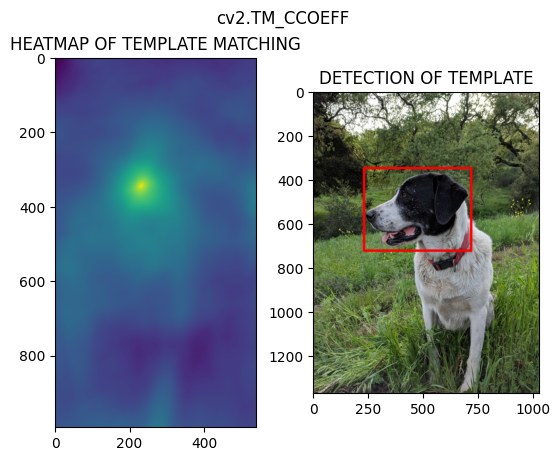

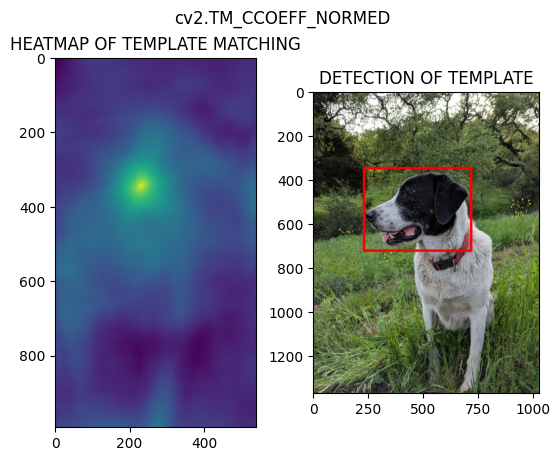

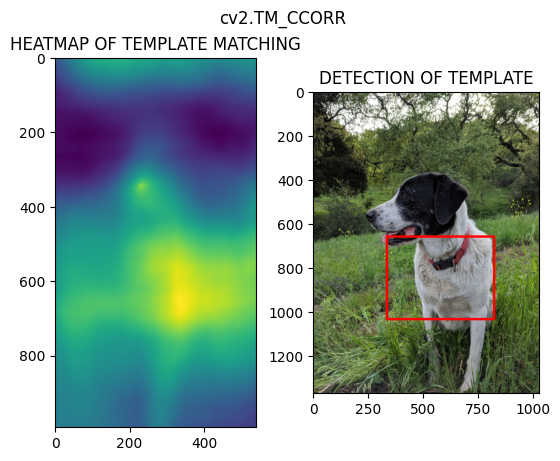

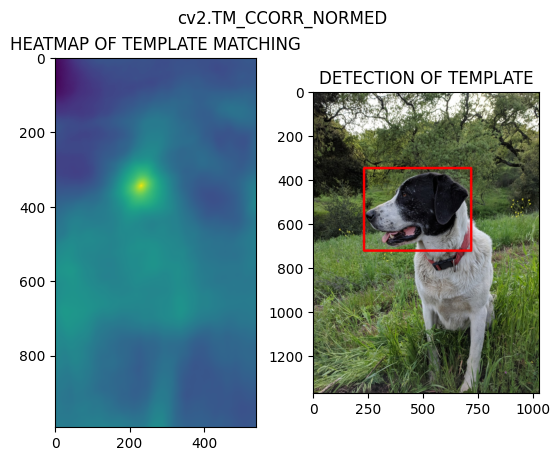

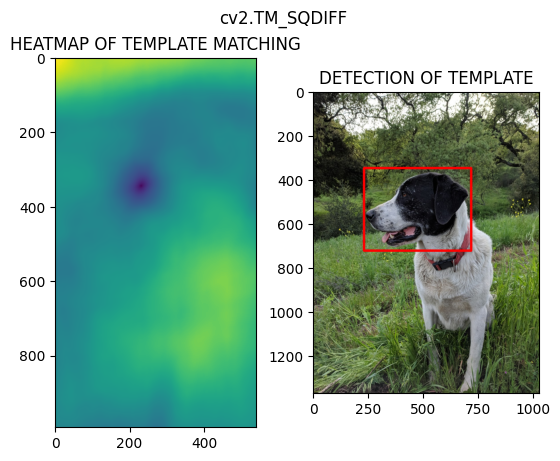

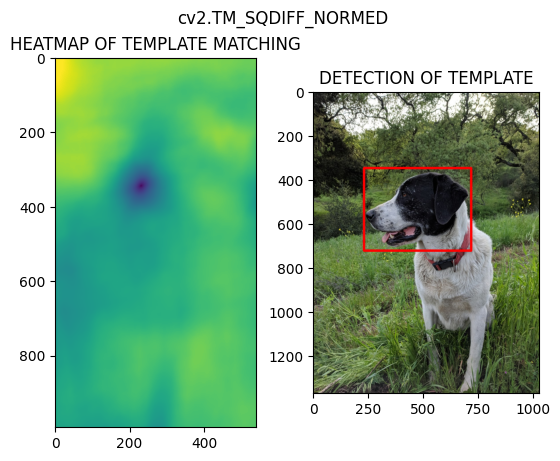

In [13]:
for m in methods:
  # create a copy of the full image
  full_copy = full.copy()

  method = eval(m)

  # template matching
  # -> Takes the full_copy and tries to find the face in the full_copy
  # -> generates a heatmap basically, almost all of the methods try to find the highest value match (correlation)
  # -> imshow(res) would show a heatmap
  res = cv2.matchTemplate(full_copy, face, method)

  # Now we need to find the max values and draw a rectangle on the copy of the dog image
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

  # setting up the corners for the rectangle
  # two methods work with the min value, so we need to check for them
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc

  height, width, channels = face.shape # Dimensions for the rectangle like the shape of the dog face

  bottom_right = (top_left[0] + width, top_left[1] + height)

  cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)

  # Plot and show images
  plt.subplot(121)
  plt.imshow(res)
  plt.title("HEATMAP OF TEMPLATE MATCHING")


  plt.subplot(122)
  plt.imshow(full_copy)
  plt.title("DETECTION OF TEMPLATE")
  plt.suptitle(m)

  plt.show()
  print("\n")
  print("\n")
